# Data Cleaning Process

This notebook outlines the data cleaning process for the US births dataset from 2016 to 2021. The process includes:

1. Loading and initial inspection of the dataset
2. Checking for missing values and duplicates
3. Examining data types and structure
4. Visualizing data distributions and relationships (as seen in below cell outputs)

The goal is to prepare a clean, consistent dataset for further analysis and modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../Data/us_births_2016_2021.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

     State State Abbreviation  Year Gender  \
0  Alabama                 AL  2016      F   
1  Alabama                 AL  2016      F   
2  Alabama                 AL  2016      F   
3  Alabama                 AL  2016      F   
4  Alabama                 AL  2016      F   

                Education Level of Mother  Education Level Code  \
0                       8th grade or less                     1   
1  9th through 12th grade with no diploma                     2   
2   High school graduate or GED completed                     3   
3   Some college credit, but not a degree                     4   
4               Associate degree (AA, AS)                     5   

   Number of Births  Average Age of Mother (years)  Average Birth Weight (g)  
0              1052                           27.8                    3116.9  
1              3436                           24.1                    3040.0  
2              8777                           25.4                    3080.0  
3   

In [11]:
# Describe the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")





              Year  Education Level Code  Number of Births  \
count  5496.000000           5496.000000       5496.000000   
mean   2018.500728              3.026201       4115.443959   
std       1.707554              4.733406       6687.036797   
min    2016.000000             -9.000000         10.000000   
25%    2017.000000              2.000000        559.000000   
50%    2019.000000              4.000000       1692.000000   
75%    2020.000000              6.000000       5140.000000   
max    2021.000000              8.000000      59967.000000   

       Average Age of Mother (years)  Average Birth Weight (g)  
count                    5496.000000               5496.000000  
mean                       29.552274               3250.887627  
std                         2.779735                114.456090  
min                        23.100000               2451.900000  
25%                        27.500000               3182.200000  
50%                        29.600000               

In [3]:
# Show the datatypes of the columns
print(df.dtypes)

# Show the columns in the dataset
print(df.columns)

# Show the index of the dataset
print(df.index)



State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object
Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')
RangeIndex(start=0, stop=5496, step=1)


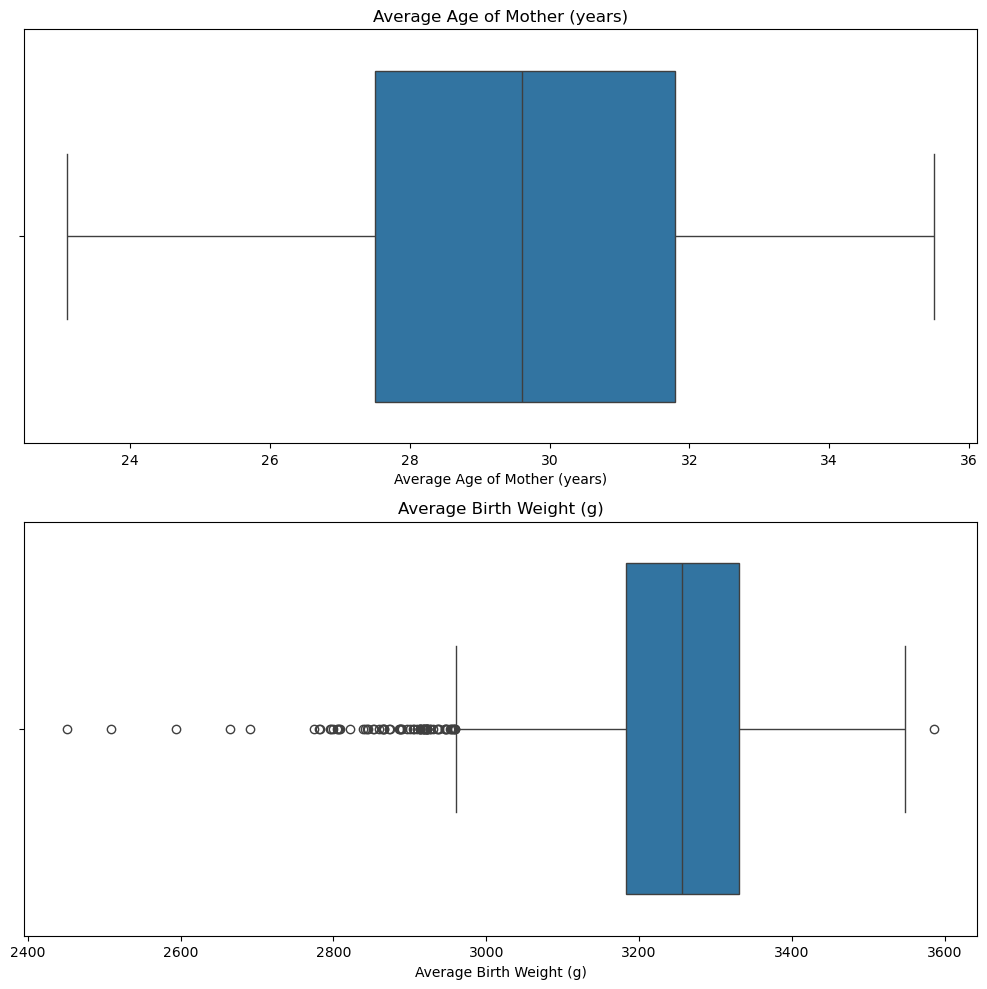

In [5]:
# Function to plot boxplots for numeric columns
def plot_boxplots(df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 5*len(columns)))
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i] if len(columns) > 1 else axes)
        axes[i].set_title(col) if len(columns) > 1 else axes.set_title(col)
    plt.tight_layout()
    plt.show()

numeric_columns = ['Average Age of Mother (years)', 'Average Birth Weight (g)']
plot_boxplots(df, numeric_columns)

# Identify and handle outliers (example for Average Age of Mother)
Q1 = df['Average Age of Mother (years)'].quantile(0.25)
Q3 = df['Average Age of Mother (years)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Average Age of Mother (years)'] = df['Average Age of Mother (years)'].clip(lower_bound, upper_bound)


In [8]:
# Calculate lower and upper bounds for Average Birth Weight
Q1_birth_weight = df['Average Birth Weight (g)'].quantile(0.25)
Q3_birth_weight = df['Average Birth Weight (g)'].quantile(0.75)
IQR_birth_weight = Q3_birth_weight - Q1_birth_weight
lower_bound_birth_weight = Q1_birth_weight - 1.5 * IQR_birth_weight
upper_bound_birth_weight = Q3_birth_weight + 1.5 * IQR_birth_weight

# Count the outliers of Average Birth Weight
outliers_low = df[df['Average Birth Weight (g)'] < lower_bound_birth_weight]
outliers_high = df[df['Average Birth Weight (g)'] > upper_bound_birth_weight]
total_outliers = len(outliers_low) + len(outliers_high)

print(f"Number of datapoints considered as outliers for Average Birth Weight: {total_outliers}")
print(f"Low outliers: {len(outliers_low)}")
print(f"High outliers: {len(outliers_high)}")

# Calculate percentage of outliers
percentage_outliers = (total_outliers / len(df)) * 100
print(f"Percentage of outliers for Average Birth Weight: {percentage_outliers:.2f}%")



Number of datapoints considered as outliers for Average Birth Weight: 73
Low outliers: 72
High outliers: 1
Percentage of outliers for Average Birth Weight: 1.33%


In [9]:
# Provide details of the highest outliers
print(df[df['Average Birth Weight (g)'] > upper_bound_birth_weight])

# Provide details of the lowest outliers
print(df[df['Average Birth Weight (g)'] < lower_bound_birth_weight])

              State State Abbreviation  Year Gender Education Level of Mother  \
3129  New Hampshire                 NH  2016      M         8th grade or less   

      Education Level Code  Number of Births  Average Age of Mother (years)  \
3129                     1                35                           29.0   

      Average Birth Weight (g)  
3129                    3585.7  
              State State Abbreviation  Year Gender Education Level of Mother  \
278         Arizona                 AZ  2019      F     Unknown or Not Stated   
314         Arizona                 AZ  2021      F     Unknown or Not Stated   
404        Arkansas                 AR  2020      F     Unknown or Not Stated   
422        Arkansas                 AR  2021      F     Unknown or Not Stated   
431        Arkansas                 AR  2021      M     Unknown or Not Stated   
...             ...                ...   ...    ...                       ...   
5252  West Virginia                 WV  2020 

In [12]:
# Check for missing state-year combinations
state_year_combinations = df.groupby(['State', 'Year']).size().unstack()
print("Missing state-year combinations:")
print(state_year_combinations.isnull().sum())

Missing state-year combinations:
Year
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
dtype: int64


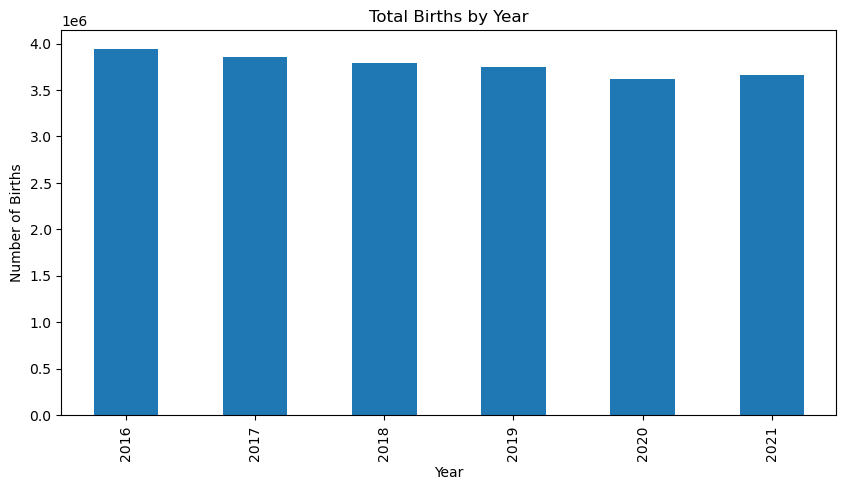

In [22]:
# Plot total births by year to check for consistency
yearly_births = df.groupby('Year')['Number of Births'].sum()
plt.figure(figsize=(10, 5))
yearly_births.plot(kind='bar')
plt.title('Total Births by Year')
plt.ylabel('Number of Births')
plt.xlabel('Year')
plt.show()


# Conclusion

Based on the data cleaning steps performed above, we can conclude that:

1. The dataset is consistent across years and states.
2. Outliers in the Average Birth Weight are within an acceptable range and do not require removal.
3. There are no missing state-year combinations in the dataset.
4. The total births by year show a consistent pattern without any unexpected spikes or drops.

Given these observations, we can confidently state that the dataset passes our data quality checks and cleaning steps. No further modifications or data transformations are necessary at this stage. The dataset is now ready for further analysis and modeling.
